## Part4. Discussion





In [2]:
import pandas as pd
import os
import numpy as np

In [5]:
import numpy as np
import torch
import dgl
from dgl import DGLGraph
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import rdDepictor
from IPython.display import SVG
from hgnn.model import HGNNPredictor
from hgnn.features import Graph_smiles

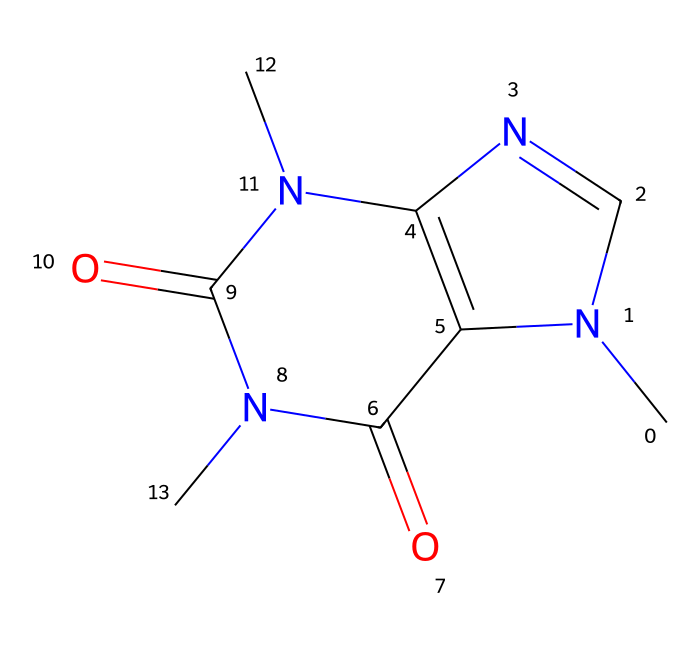

In [7]:
smi = "CN1C=NC2=C1C(=O)N(C(=O)N2C)C"
molecule = Chem.MolFromSmiles(smi)
d2d = rdMolDraw2D.MolDraw2DSVG(700,650)
d2d.drawOptions().addAtomIndices=True
d2d.DrawMolecule(molecule)
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

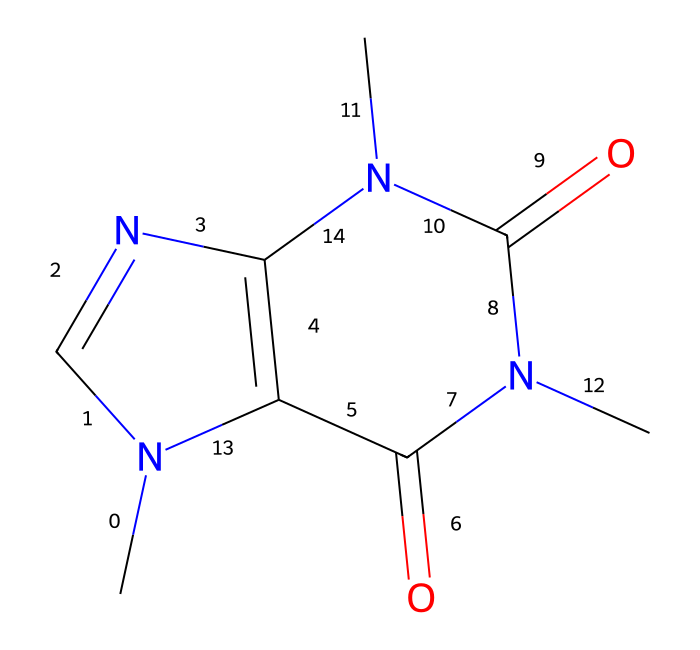

In [46]:
smi = "CN1C=NC2=C1C(=O)N(C(=O)N2C)C"
molecule = Chem.MolFromSmiles(smi)
d2d = rdMolDraw2D.MolDraw2DSVG(700,650)
d2d.drawOptions().addBondIndices=True
d2d.DrawMolecule(molecule)
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

<Figure size 1920x1440 with 0 Axes>

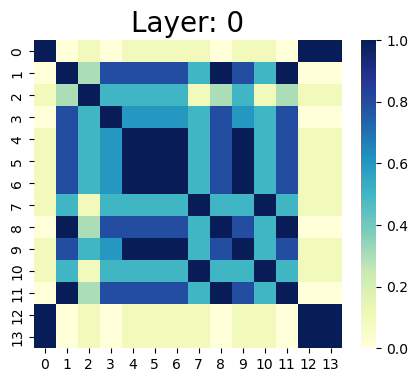

<Figure size 1920x1440 with 0 Axes>

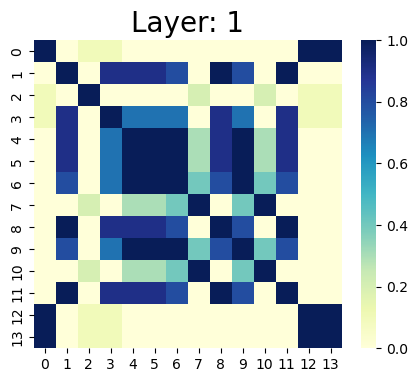

<Figure size 1920x1440 with 0 Axes>

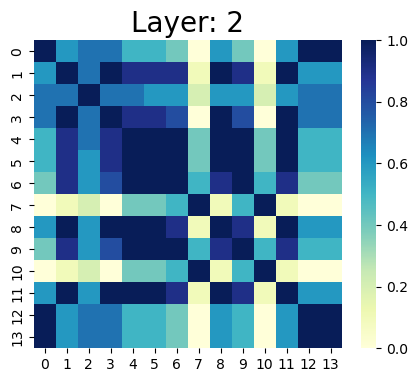

In [88]:
from rdkit import Chem
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import rdDepictor
rdDepictor.SetPreferCoordGen(True)
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import SVG
import rdkit
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt



smi = "CN1C=NC2=C1C(=O)N(C(=O)N2C)C"


g = Graph_smiles(smi)

fa1 = g.ndata['h']
fa2 = np.loadtxt('/home/hy/Documents/Project/bitterants/node1.txt')
fa3 = np.loadtxt('/home/hy/Documents/Project/bitterants/node2.txt')

mol = Chem.MolFromSmiles(smi)
# for atom in mol.GetAtoms():
#     print(atom.GetSymbol())
# for bond in mol.GetBonds():
#     print(bond.GetBondType())

# intra_mol_correlation = [np.corrcoef(fa1[:,L]) for L in range(radius+1)]
arr1 = np.corrcoef(fa1)
arr2 = np.corrcoef(fa2)
arr3 = np.corrcoef(fa3)
intra_atom_correlation = [np.corrcoef(fa1),np.corrcoef(fa2),np.corrcoef(fa3)]

for L in range(3):
    plt.figure(dpi=300)
    fig, ax = plt.subplots(figsize=(5,4))
    # mask = np.zeros_like(intra_mol_correlation[L])
    # mask[np.triu_indices_from(mask)] = False
    sns.heatmap(np.around(intra_atom_correlation[L],1),cmap="YlGnBu", annot=False, ax=ax, square=True, annot_kws={"size": 16},vmin=0,vmax=1)
    plt.title('Layer: {}'.format(L),fontsize=20)
plt.show()
plt.close()



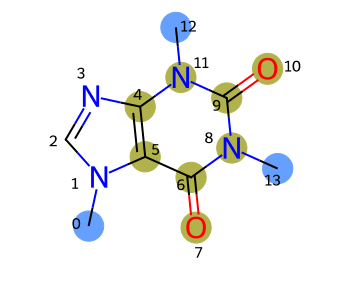

In [89]:
ls1 = [4,5,6, 9]
ls2 = [0,12,13]

def filter(ls, arr):
    rst = []
    for i in range(len(arr)):
        for j in ls:
            if i >= j:
                if arr[i][j] > 0.3:
                    rst.append(i)
    return list(set(rst))

ls_1 = filter(ls1, arr1)
ls_2 = filter(ls2, arr1)


colour = {}
for i in ls_1:
    colour[i] = [(0.7, 0.7, 0.3)]
for i in ls_2:
    colour[i] = [(0.4, 0.63, 1)]
d2d = rdMolDraw2D.MolDraw2DSVG(350,300)
d2d.drawOptions().addAtomIndices=True
d2d.DrawMoleculeWithHighlights(mol," ",colour,{},{},{})
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())



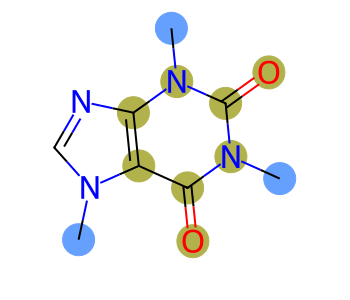

In [41]:
ls1 = [4,5,6, 9]
ls2 = [0,12,13]

def filter(ls, arr):
    rst = []
    for i in range(len(arr)):
        for j in ls:
            if i >= j:
                if arr[i][j] > 0.3:
                    rst.append(i)
    return list(set(rst))

ls_1 = filter(ls1, arr2)
ls_2 = filter(ls2, arr2)


colour = {}
for i in ls_1:
    colour[i] = [(0.7, 0.7, 0.3)]
for i in ls_2:
    colour[i] = [(0.4, 0.63, 1)]
d2d = rdMolDraw2D.MolDraw2DSVG(350,300)
d2d.DrawMoleculeWithHighlights(mol," ",colour,{},{},{})
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

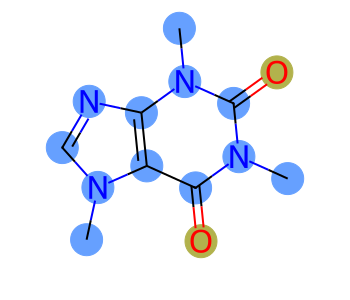

In [42]:
ls1 = [4,5,6, 9]
ls2 = [0,12,13]

def filter(ls, arr):
    rst = []
    for i in range(len(arr)):
        for j in ls:
            if i >= j:
                if arr[i][j] > 0.3:
                    rst.append(i)
    return list(set(rst))

ls_1 = filter(ls1, arr3)
ls_2 = filter(ls2, arr3)


colour = {}
for i in ls_1:
    colour[i] = [(0.7, 0.7, 0.3)]
for i in ls_2:
    colour[i] = [(0.4, 0.63, 1)]
d2d = rdMolDraw2D.MolDraw2DSVG(350,300)
d2d.DrawMoleculeWithHighlights(mol," ",colour,{},{},{})
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

In [48]:
g = Graph_smiles(smi)

fa1 = g.edata['e']
fa2 = np.loadtxt('/home/hy/Documents/Project/bitterants/edge1.txt')
fa3 = np.loadtxt('/home/hy/Documents/Project/bitterants/edge2.txt')

mol = Chem.MolFromSmiles(smi)
# for atom in mol.GetAtoms():
#     print(atom.GetSymbol())
for bond in mol.GetBonds():
    print(bond.GetBondType())

# intra_mol_correlation = [np.corrcoef(fa1[:,L]) for L in range(radius+1)]
arr1 = np.corrcoef(fa1)
arr2 = np.corrcoef(fa2)
arr3 = np.corrcoef(fa3)
intra_atom_correlation = [np.corrcoef(fa1),np.corrcoef(fa2),np.corrcoef(fa3)]

for L in range(3):
    plt.figure(dpi=300)
    fig, ax = plt.subplots(figsize=(5,4))
    # mask = np.zeros_like(intra_mol_correlation[L])
    # mask[np.triu_indices_from(mask)] = False
    sns.heatmap(np.around(intra_atom_correlation[L],1),cmap="YlGnBu", annot=False, ax=ax, square=True, annot_kws={"size": 16},vmin=0,vmax=1)
    plt.title('Layer: {}'.format(L),fontsize=20)
plt.show()
plt.close()

SINGLE
AROMATIC
AROMATIC
AROMATIC
AROMATIC
AROMATIC
DOUBLE
AROMATIC
AROMATIC
DOUBLE
AROMATIC
SINGLE
SINGLE
AROMATIC
AROMATIC


/home/hy/Softwares/Program/miniconda3/envs/ml/lib/python3.8/site-packages/dgl/heterograph.py:72: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  dgl_warning('Recommend creating graphs by `dgl.graph(data)`'


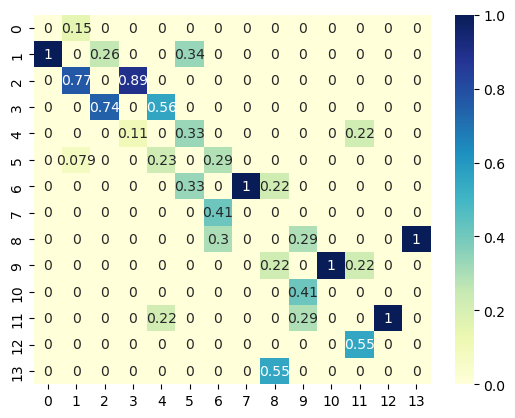

In [60]:


import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import rdchem

smi = "CN1C=NC2=C1C(=O)N(C(=O)N2C)C"
mol = Chem.MolFromSmiles(smi)

matrix = np.zeros((mol.GetNumAtoms(), mol.GetNumAtoms()))

edge_attention = np.loadtxt("/home/hy/Documents/Project/bitterants/edge_attention.txt")


n=0
for i in range(mol.GetNumAtoms()):
    atom_i = mol.GetAtomWithIdx(i) 
    for j in range(mol.GetNumAtoms()):
        bond_ij = mol.GetBondBetweenAtoms(i, j)
        if bond_ij is not None:
            matrix[i,j] = edge_attention[n]
            n+=1

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.heatmap(matrix, annot=True, cmap="YlGnBu")

plt.show()


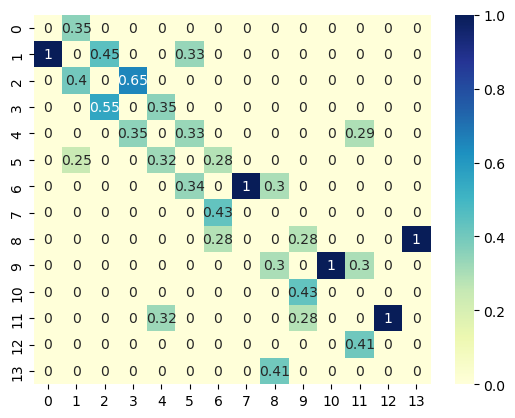

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import rdchem

smi = "CN1C=NC2=C1C(=O)N(C(=O)N2C)C"
mol = Chem.MolFromSmiles(smi)

matrix = np.zeros((mol.GetNumAtoms(), mol.GetNumAtoms()))

node_attention = np.loadtxt("/home/hy/Documents/Project/bitterants/node_attention.txt")

n=0
for i in range(mol.GetNumAtoms()):
    atom_i = mol.GetAtomWithIdx(i) 
    for j in range(mol.GetNumAtoms()):
        bond_ij = mol.GetBondBetweenAtoms(i, j)
        if bond_ij is not None:
            matrix[i,j] = node_attention[n]
            n+=1

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.heatmap(matrix, annot=True, cmap="YlGnBu")
plt.show()

0.35165005922317505
1.0
0.44579392671585083
0.3334079682826996
0.402263343334198
0.6520784497261047
0.5542060732841492
0.35225018858909607
0.34792155027389526
0.32988959550857544
0.29307907819747925
0.24608662724494934
0.32342442870140076
0.2831631302833557
0.3367024064064026
1.0
0.29732680320739746
0.43210554122924805
0.284731388092041
0.2842000722885132
1.0
0.29709571599960327
1.0
0.29888230562210083
0.43159979581832886
0.32432541251182556
0.2842000722885132
1.0
0.4080386757850647
0.40557751059532166


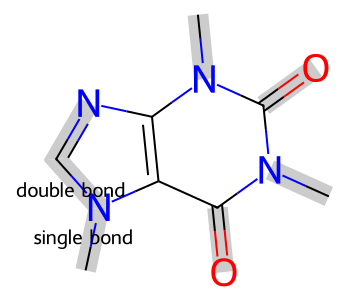

In [112]:



matrix = np.zeros((mol.GetNumAtoms(), mol.GetNumAtoms()))

dic = {}
ls = []
n=0
for i in range(mol.GetNumAtoms()):
    atom_i = mol.GetAtomWithIdx(i) 
    for j in range(mol.GetNumAtoms()):
        bond_ij = mol.GetBondBetweenAtoms(i, j)
        if bond_ij is not None:
            matrix[i,j] = node_attention[n]
            n+=1
            ls.append(bond_ij.GetIdx())
ls2= []
for i,value in enumerate(node_attention):
    print(value)
    if value > 0.4:
        ls2.append(ls[i])
            
cp = Chem.Mol(mol)
# cp.GetBondWithIdx(0).SetProp("bondNote","single bond")
# cp.GetBondWithIdx(1).SetProp("bondNote","double bond")
d2d = rdMolDraw2D.MolDraw2DSVG(350,300)
d2d.drawOptions().setHighlightColour((0.8,0.8,0.8))
d2d.DrawMolecule(cp,highlightAtoms=[],highlightBonds=ls2)
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())



#### Multi-flavor Classification 


In [3]:

from hgnn.load_data import load_data
from hgnn.features import Graph_smiles
from hgnn.trainers import train_gnn
from hgnn.model import HGNNPredictor
from contrast_gnns.GraphTransformers import *
from contrast_gnns.GraphSAGE import *
from contrast_gnns.WLN import *
from dgllife.model.model_zoo import AttentiveFPPredictor, PAGTNPredictor
PWD = os.path.abspath('.')+'/'
print(PWD)
n_tasks=8
n_node_feats=74
n_edge_feats=12

rsts = []

df = pd.read_csv(PWD+"/dataset/taste_dataset/multi_flavor/sampled.csv", header=0, sep='\t')
tuple_ls = list(zip(list(df['Smiles']), list(df['Label'])))
kfolds = load_data(tuple_ls, featurizer=Graph_smiles, if_all=False, Stratify=True, if_torch=True, batchsize=int(len(tuple_ls)/16), graph=True, drop_last=True)

model = HGNNPredictor(
                    node_gat = True, 
                    edge_gat = True, 
                    weave = True, 
                    mpnn = True, 
                    n_node_feats=n_node_feats, n_edge_feats=n_edge_feats, num_layers=2, n_heads=5, n_hidden_feats=100, activation=F.relu, attn_activation=nn.LeakyReLU(negative_slope=0.2), attn_dropout=0, feat_dropout=0, xavier_normal=False, n_tasks=n_tasks,
                    )

rst = train_gnn.train_multi_classify_kfolds(model, kfolds=kfolds, edge=True, max_epochs=500, patience=8, save_folder=PWD+'/pretrained/',save_name='multi_hgnn.pth')
rsts.append(rst)

# other 5 models
model = WLNPredictor(node_in_feats=n_node_feats, edge_in_feats=n_edge_feats, node_out_feats=100, n_layers=2, project_in_feats=True, set_comparison=True, n_tasks=n_tasks)
rst = train_gnn.train_multi_classify_kfolds(model, kfolds=kfolds, edge=True, max_epochs=500, patience=8, save_folder=PWD+'/pretrained/',save_name='multi_wln.pth')
rsts.append(rst)

model = AttentiveFPPredictor(node_feat_size=n_node_feats,edge_feat_size=n_edge_feats,num_layers=2,num_timesteps=2,graph_feat_size=100,n_tasks=n_tasks,dropout=0.) 
rst = train_gnn.train_multi_classify_kfolds(model, kfolds=kfolds, edge=True, max_epochs=500, patience=8, save_folder=PWD+'/pretrained/',save_name='multi_afp.pth')
rsts.append(rst)

model = GraphSAGEPredictor(in_feats=n_node_feats, hidden_feats=[100,100], activation=None, dropout=None, aggregator_type=None, n_tasks=n_tasks)
rst = train_gnn.train_multi_classify_kfolds(model, kfolds=kfolds, edge=False, max_epochs=500, patience=8, save_folder=PWD+'/pretrained/',save_name='multi_gsage.pth')
rsts.append(rst)

print(rsts)
np.savetxt(PWD+"/results/mulit-flavor.csv" , np.array(rsts), fmt='%.2f')


/home/hy/Documents/Project/bitterants/


/home/hy/Softwares/Program/miniconda3/envs/ml/lib/python3.8/site-packages/dgl/heterograph.py:72: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  dgl_warning('Recommend creating graphs by `dgl.graph(data)`'
/home/hy/Softwares/Program/miniconda3/envs/ml/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hy/Softwares/Program/miniconda3/envs/ml/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hy/Softwares/Program/miniconda3/envs/ml/lib/python3.8/site-packages/sklearn/

[array([0.79983667, 0.79125   , 0.79125   , 0.78745981, 0.76383061,
       0.91882044]), array([0.82351961, 0.81875   , 0.81875   , 0.81727274, 0.79394041,
       0.92939881]), array([0.83964017, 0.8325    , 0.8325    , 0.82861963, 0.81071237,
       0.93164187]), array([0.82462033, 0.82      , 0.82      , 0.81599373, 0.79602322,
       0.92870139])]


In [4]:

tuple_ls = list(zip(list(df['Smiles']), list(df['Label'])))
all = load_data(tuple_ls, featurizer=Graph_smiles, if_all=True, Stratify=False, if_torch=True, batchsize=int(len(tuple_ls)/16), graph=True, drop_last=True)
model = HGNNPredictor(
                    node_gat = True, 
                    edge_gat = True, 
                    weave = True, 
                    mpnn = True, 
                    n_node_feats=n_node_feats, n_edge_feats=n_edge_feats, num_layers=2, n_heads=5, n_hidden_feats=100, activation=F.relu, attn_activation=nn.LeakyReLU(negative_slope=0.2), attn_dropout=0, feat_dropout=0, xavier_normal=False, n_tasks=n_tasks,
                    )

train_gnn.train_multi_classify_all(model, all=all, edge=True, max_epochs=500, patience=8, save_folder=PWD+'/pretrained/',save_name='multi_hgnn.pth')

# other 5 models
model = WLNPredictor(node_in_feats=n_node_feats, edge_in_feats=n_edge_feats, node_out_feats=100, n_layers=2, project_in_feats=True, set_comparison=True, n_tasks=n_tasks)
rst = train_gnn.train_multi_classify_all(model, all=all, edge=True, max_epochs=500, patience=8, save_folder=PWD+'/pretrained/',save_name='multi_wln.pth')

model = AttentiveFPPredictor(node_feat_size=n_node_feats,edge_feat_size=n_edge_feats,num_layers=2,num_timesteps=2,graph_feat_size=100,n_tasks=n_tasks,dropout=0.) 
rst = train_gnn.train_multi_classify_all(model, all=all, edge=True, max_epochs=500, patience=8, save_folder=PWD+'/pretrained/',save_name='multi_afp.pth')

model = GraphSAGEPredictor(in_feats=n_node_feats, hidden_feats=[100,100], activation=None, dropout=None, aggregator_type=None, n_tasks=n_tasks)
rst = train_gnn.train_multi_classify_all(model, all=all, edge=False, max_epochs=500, patience=8, save_folder=PWD+'/pretrained/',save_name='multi_gsage.pth')



/home/hy/Softwares/Program/miniconda3/envs/ml/lib/python3.8/site-packages/dgl/heterograph.py:72: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  dgl_warning('Recommend creating graphs by `dgl.graph(data)`'


loss: 2.0007403269410133 ACC: 0.12583333333333332 AUC: 0.6721094950159173
loss: 1.8535906597971916 ACC: 0.27666666666666667 AUC: 0.7474319260337767
loss: 1.5816567540168762 ACC: 0.42916666666666664 AUC: 0.8041815500536746
loss: 1.3812137991189957 ACC: 0.4608333333333333 AUC: 0.8145481275861384
loss: 1.288210965692997 ACC: 0.49791666666666673 AUC: 0.8265273689200305
loss: 1.2639582306146622 ACC: 0.5166666666666666 AUC: 0.8353475548314201
loss: 1.2005261182785034 ACC: 0.5404166666666668 AUC: 0.837299225967768
loss: 1.1799270287156105 ACC: 0.5683333333333334 AUC: 0.8397438943509082
loss: 1.1533785536885262 ACC: 0.55875 AUC: 0.843812066556653
loss: 1.1043928228318691 ACC: 0.5820833333333334 AUC: 0.8475877840143315
loss: 1.078240755945444 ACC: 0.5966666666666666 AUC: 0.8500518901469285
loss: 1.0451931320130825 ACC: 0.6245833333333334 AUC: 0.8558069800449142
loss: 1.040716852992773 ACC: 0.6216666666666667 AUC: 0.8579575562632277
loss: 1.040040798485279 ACC: 0.625 AUC: 0.8616204961098604
loss

In [8]:
df = pd.read_csv("/home/hy/Documents/Project/bitterants/result.csv", header=0, sep="\t")
print(df["Taste"].value_counts())

Non-Bitter      303157
Bitter          103762
error smiles       351
Name: Taste, dtype: int64
